In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

Creates a plot of approval ratings over time. Colors separate each cadidate. Sometimes there are steady transition such as Clinton to Bush Jr, and sometimes there are very steep fall offs, such as Bush Jr to Obama.

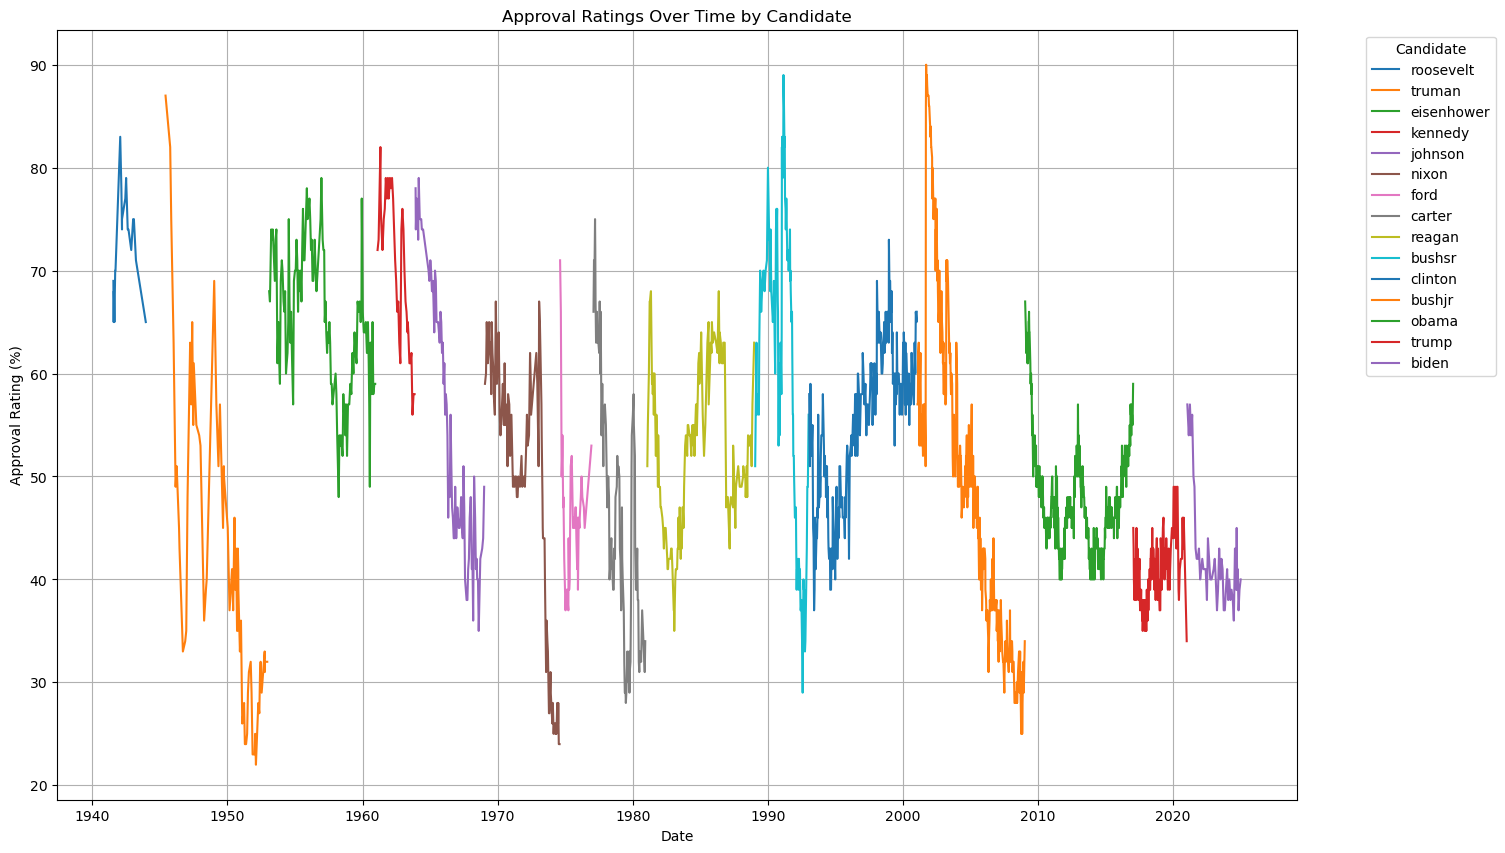

In [ ]:
files = glob.glob('../DATA/approval_rating_*_updated.csv')

# combine files into one dataframe + combine data
dfs = []
for file in files:
    df = pd.read_csv(file, sep='\t')  # Adjust separator if needed
    dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)

#switch to datetime fromat
merged_df['Start Date'] = pd.to_datetime(merged_df['Start Date'], errors='coerce')


plt.figure(figsize=(16, 10))


# order & plot based on date of presidency
presidency_order = [
    'roosevelt', 'truman', 'eisenhower', 'kennedy', 'johnson',
    'nixon', 'ford', 'carter', 'reagan', 'bushsr',
    'clinton', 'bushjr', 'obama', 'trump', 'biden'
]
for candidate in presidency_order:
    if candidate in merged_df['candidate'].unique():
        subset = merged_df[merged_df['candidate'] == candidate]
        plt.plot(subset['Start Date'], subset['Approving'], label=candidate)
#formatting
plt.title('Approval Ratings Over Time by Candidate')
plt.xlabel('Date')
plt.ylabel('Approval Rating (%)')

# graph formatting
plt.title('Approval Ratings Over Time by Candidate')
plt.xlabel('Date')
plt.ylabel('Approval Rating (%)')
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Adds a new csv file called approval_rating.csv that includes all of the approval rating data in order, including the candidate in a new column called candidate.

In [5]:
# load approval ratings
file_paths = [
    '../DATA/approval_rating_biden_1_updated.csv',
    '../DATA/approval_rating_trump_1_updated.csv',
    '../DATA/approval_rating_obama_1_2_updated.csv',
    '../DATA/approval_rating_bushjr_1_2_updated.csv',
    '../DATA/approval_rating_clinton_1_2_updated.csv',
    '../DATA/approval_rating_bushsr_1_updated.csv',
    '../DATA/approval_rating_reagan_1_2_updated.csv',
    '../DATA/approval_rating_carter_1_updated.csv',
    '../DATA/approval_rating_ford_1_updated.csv',
    '../DATA/approval_rating_nixon_1_2_updated.csv',
    '../DATA/approval_rating_johnson_1_2_updated.csv',
    '../DATA/approval_rating_kennedy_1_updated.csv',
    '../DATA/approval_rating_eisenhower_1_2_updated.csv',
    '../DATA/approval_rating_truman_1_updated.csv',
    '../DATA/approval_rating_roosevelt_3_4_updated.csv',
]

# read/concat
approval = pd.concat([pd.read_csv(f, sep='\t') for f in file_paths], ignore_index=True)
approval.columns = ['Start Date', 'End Date', 'Approving', 'Disapproving', 'Unsure/NoData', 'Candidate']
approval['Start Date'] = pd.to_datetime(approval['Start Date'], format='%m/%d/%Y')

approval.to_csv("../DATA/approval_rating.csv", index=False)
print(approval)


     Start Date    End Date  Approving  Disapproving  Unsure/NoData  Candidate
0    2025-01-02   1/15/2025         40            54              6      biden
1    2024-12-02  12/18/2024         39            56              5      biden
2    2024-11-06  11/20/2024         37            58              6      biden
3    2024-10-14  10/27/2024         41            39              3      biden
4    2024-10-01  10/12/2024         39            56              5      biden
...         ...         ...        ...           ...            ...        ...
1902 1941-08-26  08/26/1941         67            24              7  roosevelt
1903 1941-08-19  08/19/1941         65            26              7  roosevelt
1904 1941-08-05  08/05/1941         68            23              7  roosevelt
1905 1941-07-29  07/29/1941         65            25              8  roosevelt
1906 1941-07-22  07/22/1941         69            24              6  roosevelt

[1907 rows x 6 columns]
